<a href="https://colab.research.google.com/github/aayushdangol16/AI-LAB/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset.csv',encoding='latin1',on_bad_lines='skip')

In [ ]:
df['type'] = df['type'].replace({'defacement': 'malicious', 'phishing': 'malicious', 'malware': 'malicious'})

In [ ]:
df.to_csv('modified_file.csv', index=False)

In [ ]:
type_counts=df['type'].value_counts()

In [ ]:
type_counts

benign       428103
malicious    223085
Name: type, dtype: int64

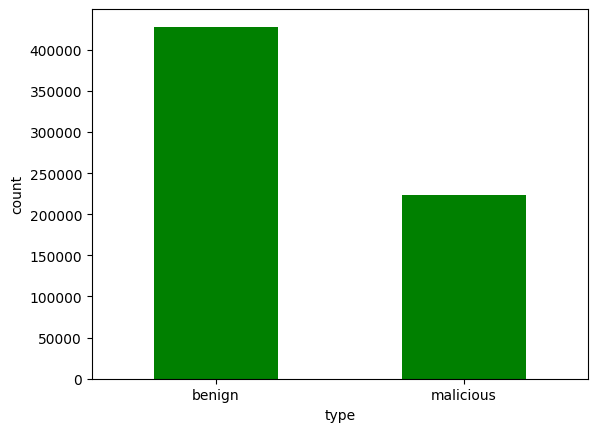

In [ ]:
type_counts.plot(kind='bar',rot=0,color='green')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

In [ ]:
df=pd.read_csv('/content/modified_file.csv')

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
benign_entries = df[df['type'] == 'benign']
malicious_entries = df[df['type'] == 'malicious']
benign_entries = benign_entries.sample(n=len(malicious_entries), random_state=42)
balanced_df = pd.concat([benign_entries, malicious_entries])
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df.to_csv('balancedData.csv', index=False)

In [ ]:
df=pd.read_csv('/content/balancedData.csv')

In [ ]:
type_counts=df['type'].value_counts()

In [ ]:
type_counts

benign       213028
malicious    213028
Name: type, dtype: int64

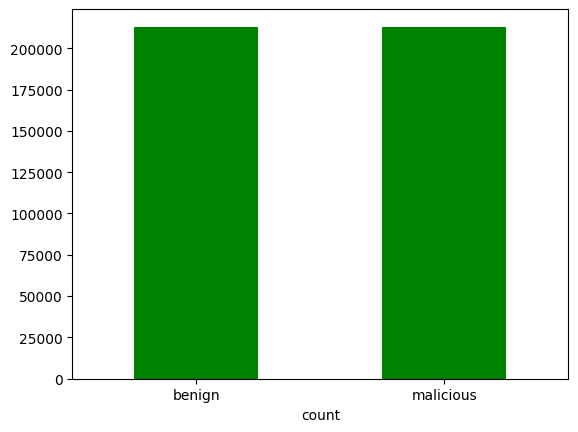

In [ ]:
type_counts.plot(kind='bar',rot=0,color='green')
plt.xlabel('type')
plt.xlabel('count')
plt.show()

In [ ]:
df['type'] = df['type'].replace({'benign': 0,'malicious':1})


In [ ]:
df

,url,type
0,en.wikipedia.org/wiki/James_Earl_Jones,0
1,rogeranaylor.com/,0
2,consumercares.net,1
3,http://www.host.hostenx.com/index.php/web-link...,1
4,http://211.137.225.61:54118/Mozi.m,1
...,...,...
426051,http://digilander.libero.it/riccardog67/,1
426052,https://pastebin.com/raw/Earh9hGr,1
426053,jacksonville.craigslist.org/fuo/2706610364.html,0
426054,http://torrentdn.com/bbs/s.php?bo_table=torren...,0


In [ ]:
df.to_csv('labelData.csv',index=False)